<a href="https://colab.research.google.com/github/AlexisL321/Group18_CS539/blob/main/Group18_CS539.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import numpy as np
import pandas as pd

Mounted at /content/drive/


In [2]:
with open('/content/drive/My Drive/prices.csv','r') as f:
  temp=pd.read_csv(f)
with open('/content/drive/My Drive/prices_split_adjusted.csv','r') as f:
  temp2=pd.read_csv(f)
temp.info()
temp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
temp2.info()
temp2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
prelim_data=temp2.values
#print(prelim_data[0:10,:])

In [5]:
#normalize the data
import sklearn.preprocessing as preprocessing
minMaxScaler=preprocessing.MinMaxScaler()
temp2['close']=minMaxScaler.fit_transform(temp2.close.values.reshape(-1,1))
temp2['open']=minMaxScaler.fit_transform(temp2.open.values.reshape(-1,1))
temp2['high']=minMaxScaler.fit_transform(temp2.high.values.reshape(-1,1))
temp2['low']=minMaxScaler.fit_transform(temp2.low.values.reshape(-1,1))
temp2['volume']=minMaxScaler.fit_transform(temp2.volume.values.reshape(-1,1))

In [7]:
nameColumn=temp2['symbol'].values
name, nameCount = np.unique(nameColumn,return_counts=True)
for i in range(0,len(nameColumn)-1):
  print(' %s has %i samples'%(name[i],nameCount[i]))

 A has 1762 samples
 AAL has 1762 samples
 AAP has 1762 samples
 AAPL has 1762 samples
 ABBV has 1008 samples
 ABC has 1762 samples
 ABT has 1762 samples
 ACN has 1762 samples
 ADBE has 1762 samples
 ADI has 1762 samples
 ADM has 1762 samples
 ADP has 1762 samples
 ADS has 1762 samples
 ADSK has 1762 samples
 AEE has 1762 samples
 AEP has 1762 samples
 AES has 1762 samples
 AET has 1762 samples
 AFL has 1762 samples
 AGN has 1762 samples
 AIG has 1762 samples
 AIV has 1762 samples
 AIZ has 1762 samples
 AJG has 1762 samples
 AKAM has 1762 samples
 ALB has 1762 samples
 ALK has 1762 samples
 ALL has 1762 samples
 ALLE has 786 samples
 ALXN has 1762 samples
 AMAT has 1762 samples
 AME has 1762 samples
 AMG has 1762 samples
 AMGN has 1762 samples
 AMP has 1762 samples
 AMT has 1762 samples
 AMZN has 1762 samples
 AN has 1762 samples
 ANTM has 1762 samples
 AON has 1762 samples
 APA has 1762 samples
 APC has 1762 samples
 APD has 1762 samples
 APH has 1762 samples
 ARNC has 1762 samples
 A

IndexError: ignored

In [34]:
#We choose one company's stock for the convenience of saving time while developing codes
dataAAL=temp2[temp2.symbol=='AAL'].copy().values
print(dataAAL[0:10,:])
dataAAP=temp2[temp2.symbol=='AAP'].copy().values

[['2010-01-04' 'AAL' 0.002009123263206682 0.00201707536117994
  0.002040763685002362 0.0019573264634951547 0.011443465976706155]
 ['2010-01-05' 'AAL' 0.0019775332747914826 0.0023595975923237033
  0.0020730542496384748 0.0022262243482564694 0.02932844014157498]
 ['2010-01-06' 'AAL' 0.0022302531821130783 0.002220051498154022
  0.002260339524527932 0.002232477787436965 0.019307889759870196]
 ['2010-01-07' 'AAL' 0.0021481192122335593 0.002315196562360623
  0.0022926300891640454 0.0022637449833394436 0.016324676022639154]
 ['2010-01-08' 'AAL' 0.0022807971635773966 0.0022517665195562224
  0.002299088202091268 0.0022637449833394436 0.01484336412051788]
 ['2010-01-11' 'AAL' 0.0021923451960148385 0.002188336476751822
  0.0022215908469645964 0.0021386761997295297 0.012741213391506292]
 ['2010-01-12' 'AAL' 0.0021481192122335593 0.002213708493873582
  0.0022345070728190418 0.002088648686285564 0.009155307886968014]
 ['2010-01-13' 'AAL' 0.002186027198331799 0.002467428665091185
  0.0022732557503823

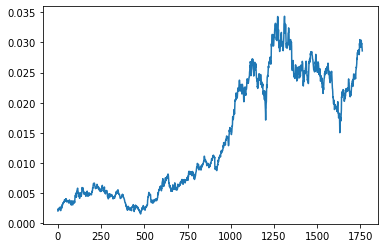

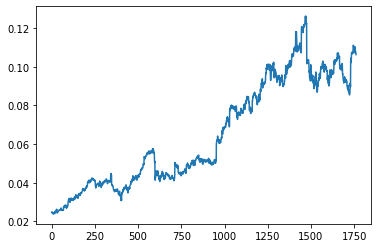

In [65]:
closingAAL=dataAAL[:,3]
#print(closingAAL[:10])
closingAAP=dataAAP[:,3]
import matplotlib.pyplot as plt
plt.plot(closingAAL)
plt.show()
plt.plot(closingAAP)
plt.show()

In [14]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [82]:
look_back = 1
trainX1, trainY1 = create_dataset(closingAAL, look_back)
trainX=trainX1.reshape(1760)
trainY=trainY1.reshape(1760)
indexX=np.ones(len(trainX))
indexY=np.ones(len(trainY))
combinedX=np.vstack((indexX, trainX)).T
combinedY=np.vstack((indexY,trainY)).T
for i in range(0,1759):
  combinedX[i,0]=i
  combinedY[i,0]=i

#print(combinedX[:10])
#print(combinedY[:10])
testX1, testY1 = create_dataset(closingAAP, look_back)
testX=testX1.reshape(1760)
testY=testY1.reshape(1760)
testX=np.vstack((indexX, testX)).T
testY=np.vstack((indexY,testY)).T

In [83]:
combinedTrainX=np.vstack((indexX,indexX))
combinedTrainX=np.vstack((combinedTrainX,trainX)).T
combinedTrainY=np.vstack((indexX,indexY))
combinedTrainY=np.vstack((combinedTrainY,trainY)).T
for i in range(0,1759):
  combinedTrainX[i,0]=i
  combinedTrainY[i,0]=i
#print(combinedTrainX[:10,:],combinedTrainY[:10,:])
#combinedX = np.reshape(combinedX, (combinedX.shape[0], 1, combinedX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Masking
from keras.layers import LSTM, Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [88]:
combinedTrainX.astype(np.float32)
combinedTrainY.astype(np.float32)
import tensorflow as tf
X=tf.convert_to_tensor(trainX1,dtype=tf.float32)
Y=tf.convert_to_tensor(trainY1,dtype=tf.float32)

In [94]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
1760/1760 - 5s - loss: 5.8232e-05 - 5s/epoch - 3ms/step
Epoch 2/5
1760/1760 - 3s - loss: 3.4563e-07 - 3s/epoch - 1ms/step
Epoch 3/5
1760/1760 - 3s - loss: 3.8679e-07 - 3s/epoch - 1ms/step
Epoch 4/5
1760/1760 - 3s - loss: 4.9842e-07 - 3s/epoch - 1ms/step
Epoch 5/5
1760/1760 - 3s - loss: 4.7793e-07 - 3s/epoch - 1ms/step


In [91]:
dataFAST=temp2[temp2.symbol=='FAST'].copy().values
closingFAST=dataFAST[:,3]
trainXFAST, trainYFAST = create_dataset(closingFAST, look_back)
train_size = int(len(trainXFAST) * 0.67)
test_size = len(trainXFAST) - train_size
trainXFAST_trimmed, testXFAST = trainXFAST[0:train_size], trainXFAST[train_size:len(trainXFAST)]
trainYFAST_trimmed=trainYFAST[0:train_size]
testYFAST=trainYFAST[train_size:len(trainXFAST)]
print(len(trainXFAST_trimmed), len(testXFAST))
trainXFAST_trimmed=tf.convert_to_tensor(trainXFAST_trimmed,dtype=tf.float32)
trainYFAST_trimmed=tf.convert_to_tensor(trainYFAST_trimmed,dtype=tf.float32)


1179 581


In [90]:
model.fit(trainXFAST_trimmed, trainYFAST_trimmed, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
1179/1179 - 3s - loss: 4.4820e-07 - 3s/epoch - 2ms/step
Epoch 2/10
1179/1179 - 3s - loss: 4.4752e-07 - 3s/epoch - 2ms/step
Epoch 3/10
1179/1179 - 3s - loss: 4.8442e-07 - 3s/epoch - 2ms/step
Epoch 4/10
1179/1179 - 2s - loss: 4.8068e-07 - 2s/epoch - 2ms/step
Epoch 5/10
1179/1179 - 2s - loss: 3.9840e-07 - 2s/epoch - 1ms/step
Epoch 6/10
1179/1179 - 2s - loss: 4.8271e-07 - 2s/epoch - 1ms/step
Epoch 7/10
1179/1179 - 2s - loss: 4.5041e-07 - 2s/epoch - 1ms/step
Epoch 8/10
1179/1179 - 2s - loss: 4.0749e-07 - 2s/epoch - 1ms/step
Epoch 9/10
1179/1179 - 2s - loss: 4.7450e-07 - 2s/epoch - 1ms/step
Epoch 10/10
1179/1179 - 2s - loss: 4.4948e-07 - 2s/epoch - 2ms/step


In [96]:
testXFAST=tf.convert_to_tensor(testXFAST,dtype=tf.float32)
FAST_pred=model.predict(testXFAST)
model.evaluate(FAST_pred, testYFAST)

19/19 [==============================] - 1s 2ms/step - loss: 2.8003e-06


2.800312131512328e-06

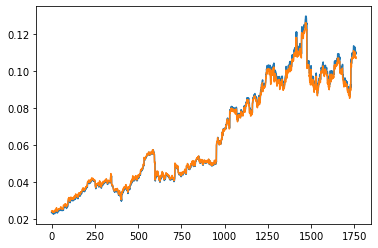

55/55 [==============================] - 1s 1ms/step - loss: 7.8376e-06
[[0.02377744]
 [0.02362332]
 [0.02384808]
 ...
 [0.10974666]
 [0.11038618]
 [0.10943031]] [0.02445228 0.02467429 0.02466794 ... 0.10798965 0.10708894 0.10700014]


In [95]:
testX2=tf.convert_to_tensor(testX1,dtype=tf.float32)
testPredict = model.predict(testX2)
plt.plot(testPredict)
plt.plot(testY1)
plt.show()
model.evaluate(testPredict,testY1)
print(testPredict,testY1)

In [ ]:
testPredict = minMaxScaler.inverse_transform(testPredict)
testY = minMaxScaler.inverse_transform([testY])
testScore = np.sqrt(testY(testY[0], testPredict[:,0]))


In [ ]:
def LSTM(dataset):
  

In [ ]:
import math
from sklearn.metrics import mean_squared_error
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))